#Load data

In [1]:
import os

if os.getenv("COLAB_RELEASE_TAG"):
   place_code = "Running in Colab"
   print(place_code)
   from google.colab import drive
   drive.mount('/content/drive')
   # Корневая папка на диске для работы с заданием - которую вы должны создать себе и указать
   os.chdir('/content/drive/Othercomputers/Пресня/AI-Хакатон_2023_Яндекс.Маркет')

else:
  place_code = "NOT in Colab"
  print(place_code)

HOME = os.getcwd()
print(HOME)

Running in Colab
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Othercomputers/Пресня/AI-Хакатон_2023_Яндекс.Маркет


In [2]:
import json
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [3]:
d = {'all':[]}
with open(HOME + '/pictures_market') as infile:
    for line in infile:
        result = json.loads(line)
        d['all'].append(result)

full_df = pd.DataFrame(d['all'])
full_df

,market_sku_id,pic_url,verdict
0,1402035435,//avatars.mds.yandex.net/get-marketpic/7044394...,clean_photo_good_background
1,1402035435,//avatars.mds.yandex.net/get-marketpic/5620596...,clean_photo_good_background
2,1402035435,//avatars.mds.yandex.net/get-marketpic/1708436...,other_infographics
3,729239006,//avatars.mds.yandex.net/get-marketpic/1897710...,clean_photo_good_background
4,429050296,//avatars.mds.yandex.net/get-marketpic/8786714...,good_infographics
...,...,...,...
1131827,100818966350,//avatars.mds.yandex.net/get-marketpic/1697981...,clean_photo_good_background
1131828,100972165930,//avatars.mds.yandex.net/get-marketpic/1582458...,clean_photo_good_background
1131829,101815744136,//avatars.mds.yandex.net/get-marketpic/7067214...,good_infographics
1131830,101603206373,//avatars.mds.yandex.net/get-marketpic/1338103...,good_infographics


In [4]:
vers = full_df['verdict'].value_counts().index.to_numpy()
print(f'Все классы - {vers}')
print()
infogrf = [1, 2, 3] # ('good_infographics', 'other_infographics', 'bad_infographics')
not_infogrf = [0, 5, 6] #('clean_photo_good_background','clean_photo_bad_background', 'clean_photo_image_background')

print(f'Классы с инфографикой - {vers[infogrf]}')
print(f'Классы без инфографики - {vers[not_infogrf]}')

Все классы - ['clean_photo_good_background' 'good_infographics' 'other_infographics'
 'bad_infographics' 'clean_photo_other_background'
 'clean_photo_bad_background' 'clean_photo_image_background']

Классы с инфографикой - ['good_infographics' 'other_infographics' 'bad_infographics']
Классы без инфографики - ['clean_photo_good_background' 'clean_photo_bad_background'
 'clean_photo_image_background']


In [5]:
test_values = list(vers[infogrf]) + list(vers[not_infogrf])
test_keys = np.arange(len(test_values))

# словарь классов
dict_catagory = dict(zip(test_keys, test_values))
dict_catagory

{0: 'good_infographics',
 1: 'other_infographics',
 2: 'bad_infographics',
 3: 'clean_photo_good_background',
 4: 'clean_photo_bad_background',
 5: 'clean_photo_image_background'}

In [6]:
def getKey(dct,value):
     return [key for key in dct if (dct[key] == value)]

take_verdict = list(dict_catagory.values())
qty = 500
random_state = 187
print(f'Берем по {qty} примеров из {take_verdict} с инфографикой')
print()
train_df = pd.concat([full_df[full_df.verdict.isin(take_verdict)][full_df.verdict == name].sample(qty,
                                                                               random_state = random_state) for name in take_verdict])
train_df.reset_index(drop= True , inplace= True )
train_df['label'] = train_df.verdict.apply(lambda x: getKey(dict_catagory, x)[0])
train_df

Берем по 500 примеров из ['good_infographics', 'other_infographics', 'bad_infographics', 'clean_photo_good_background', 'clean_photo_bad_background', 'clean_photo_image_background'] с инфографикой



,market_sku_id,pic_url,verdict,label
0,101283041966,//avatars.mds.yandex.net/get-marketpic/6098813...,good_infographics,0
1,101635319782,//avatars.mds.yandex.net/get-marketpic/7218761...,good_infographics,0
2,101840023362,//avatars.mds.yandex.net/get-marketpic/5556788...,good_infographics,0
3,764639018,//avatars.mds.yandex.net/get-marketpic/6095736...,good_infographics,0
4,101965667011,//avatars.mds.yandex.net/get-marketpic/6343704...,good_infographics,0
...,...,...,...,...
2995,100314984053,//avatars.mds.yandex.net/get-marketpic/7759057...,clean_photo_image_background,5
2996,101765329670,//avatars.mds.yandex.net/get-marketpic/1597147...,clean_photo_image_background,5
2997,101552467351,//avatars.mds.yandex.net/get-marketpic/4343034...,clean_photo_image_background,5
2998,101814649496,//avatars.mds.yandex.net/get-marketpic/6034498...,clean_photo_image_background,5


In [7]:
NUM_CLASSES = len(np.unique(train_df.label))
NUM_CLASSES

6

In [8]:
if os.getenv("COLAB_RELEASE_TAG"):
   place_code = "Running in Colab"
   print(place_code)
   # Корневая папка на диске для работы с заданием - которую вы должны создать себе и указать
   os.chdir('/content/drive/Othercomputers/My_comp/Documents/Colab_notebooks/Notebooks_GoogleDisk/Тестовые работы/GAN_hakaton_23/Final_TF')

else:
  place_code = "NOT in Colab"
  os.chdir('/Final_TF')
  print(place_code)

HOME = os.getcwd()
print(HOME)

Running in Colab
/content/drive/Othercomputers/My_comp/Documents/Colab_notebooks/Notebooks_GoogleDisk/Тестовые работы/GAN_hakaton_23/Final_TF


## Data с аугментацей

In [9]:
from Data_preprocessing import agumager
from Get_data import  get_data

In [10]:
idx = np.random.randint(0, train_df.shape[0], 7)
W, H =  256, 256
images, labels = get_data(urls = train_df.loc[idx].pic_url,
                     labels = train_df.loc[idx].label,
                     resize2 = (W, H),
                     )

print(labels)
print()
print(dict_catagory)

[4, 3, 3, 0, 2, 4, 0]

{0: 'good_infographics', 1: 'other_infographics', 2: 'bad_infographics', 3: 'clean_photo_good_background', 4: 'clean_photo_bad_background', 5: 'clean_photo_image_background'}


Мы сейчас не читаем, а детектируем, поэтому можно и вращать

Класс 2 - bad_infographics



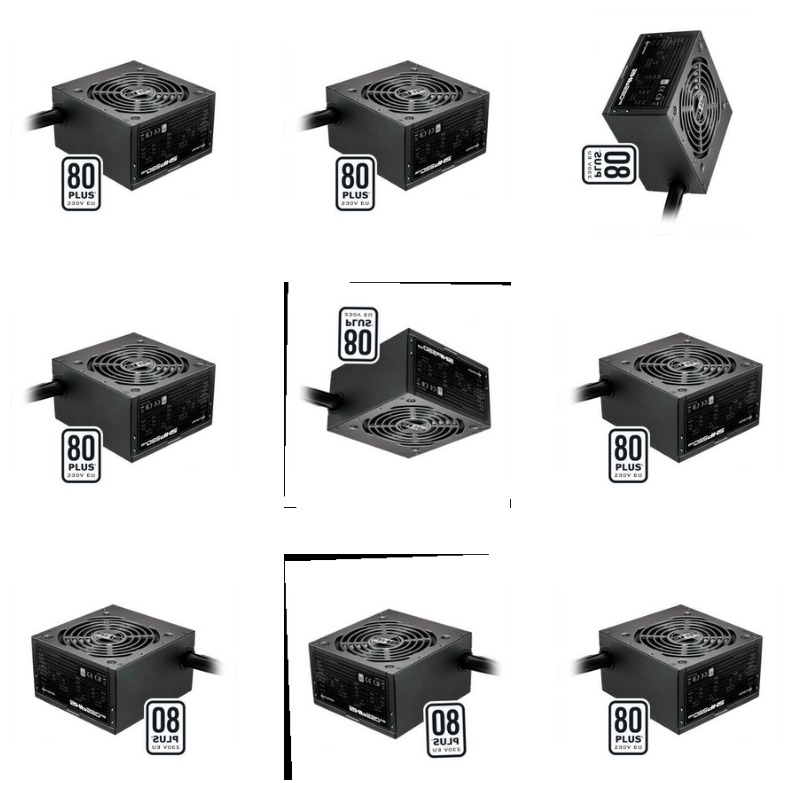

In [12]:
id = 4
print(f'Класс {labels[id]} - {dict_catagory[labels[id]]}')
print()
img = images[id]
img_bgr = np.array(img)[:, :, 2::-1]

# Пример того, как она работает.
plt.figure(figsize=(10, 10))

for i in range(9):
    aug_imag = agumager(img_bgr)#, simple_agum=False)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(aug_imag)
    plt.axis("off")

# Model SAM

Generate Segmentation with Bounding Box

The `SamPredictor` class provides an easy interface to the model for prompting the model. It allows the user to first set an image using the `set_image` method, which calculates the necessary image embeddings. Then, prompts can be provided via the `predict` method to efficiently predict masks from those prompts. The model can take as input both point and box prompts, as well as masks from the previous iteration of prediction.

## pip

In [22]:
!pip install -q git+https://github.com/facebookresearch/segment-anything.git
!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.1 MB/s eta 0:00:00


Загружаем веса из [репозитория Facebook Research](https://github.com/facebookresearch/segment-anything#model-checkpoints)

In [10]:
have_weights = True
if have_weights:
   # Корневая папка на диске для работы с заданием - которую вы должны создать себе и указать
   os.chdir('/content/drive/Othercomputers/Пресня/AI-Хакатон_2023_Яндекс.Маркет')
else:
  %cd {HOME}
  !mkdir {HOME}/weights_sam_vit
  %cd {HOME}/weights_sam_vit
  # ViT-H
  !wget -qN https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
  #!wget -qN https://edunet.kea.su/repo/EduNet-web_dependencies/weights/sam_vit_h_4b8939.pth

## Make encoder

In [11]:
import torch
from segment_anything import sam_model_registry, SamPredictor, sam_model_registry

# model_type = 'vit_h'
sam = sam_model_registry["vit_h"](checkpoint="weights_sam_vit/sam_vit_h_4b8939.pth")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sam.to(device=device)

mask_predictor = SamPredictor(sam)

In [15]:
# make predict image
mask_predictor.set_image(aug_imag)
# get outputs from SAM
masks, scores, logits = mask_predictor.predict(
    multimask_output=True
)

In [16]:
masks.shape, scores, logits.shape

((3, 256, 256),
 array([0.45184922, 0.79981637, 0.8763758 ], dtype=float32),
 (3, 256, 256))

## SHOW mask segments

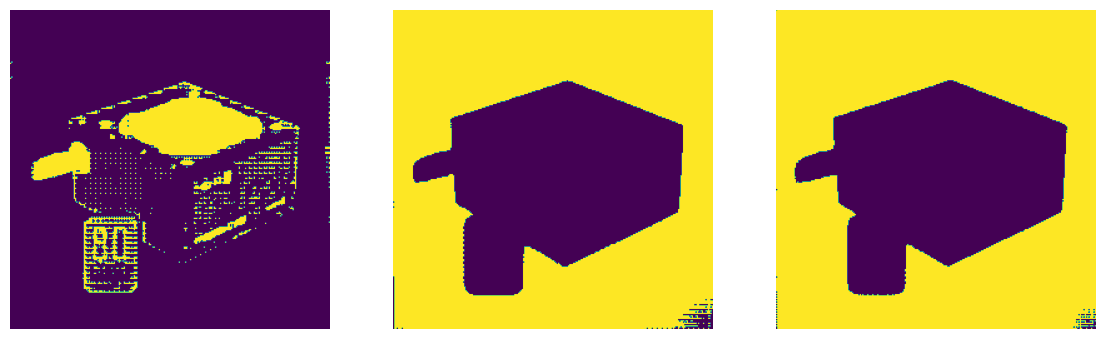

In [17]:
plt.figure(figsize=(14, 7))

for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(masks[i]*scores[i])
    plt.axis("off")
plt.show()

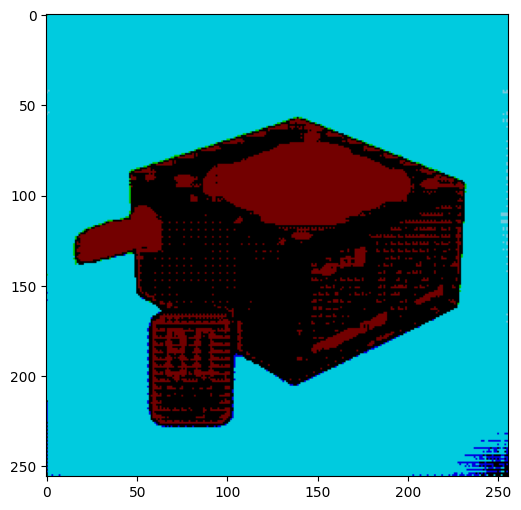

In [18]:
masks_scores = [masks[i]*scores[i] for i in range(3)]
masks_scores = np.stack(masks_scores, axis=-1)

plt.figure(figsize=(10, 6))
plt.imshow(masks_scores)
plt.show()

logits

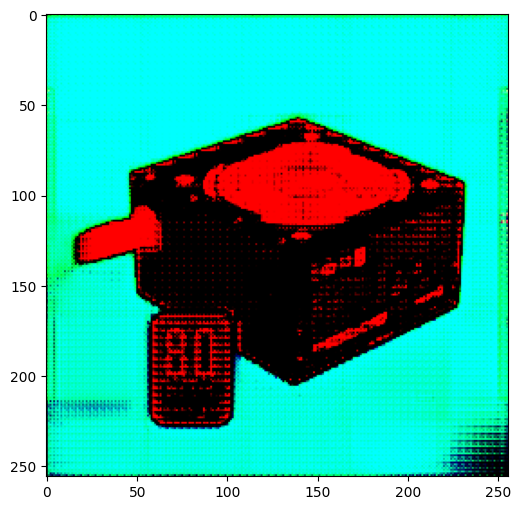

In [19]:
plt.figure(figsize=(10, 6))
plt.imshow(np.moveaxis(logits, [0], [-1]))
plt.show()

# EASYOCR
Берем данные по текстам

## pip

In [30]:
!pip install easyocr -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 13.4 MB/s eta 0:00:00


In [12]:
import easyocr
from Data_preprocessing import text_detect


## SHOW mask_text

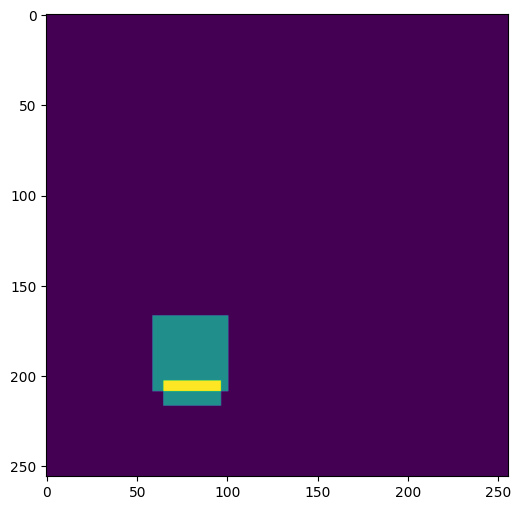

In [21]:
reader = easyocr.Reader(['ru','en'])
temp_text_box_xy = text_detect(aug_imag, reader)
print()
plt.figure(figsize=(10, 6))
plt.imshow(temp_text_box_xy)  # BGR?
plt.show()

## SHOW Interseptions segments and text

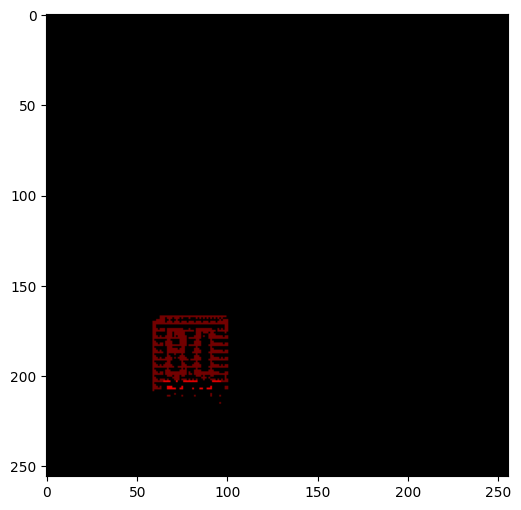

In [22]:
intsepts = [masks[i]*scores[i]*temp_text_box_xy for i in range(3)]
intsepts = np.stack(intsepts, axis=-1)

plt.figure(figsize=(10, 6))
plt.imshow(intsepts)  # BGR?
plt.show()

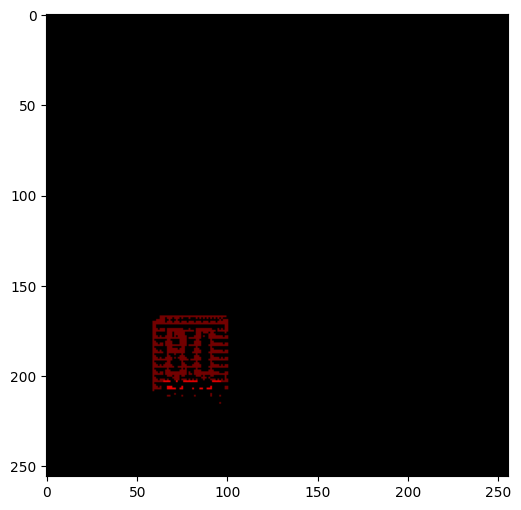

In [23]:
mask_text = temp_text_box_xy !=0
intsepts_ = [np.logical_and(mask_text, masks[i])*temp_text_box_xy*scores[i] for i in range(3)]
intsepts_ = np.stack(intsepts_, axis=-1)

plt.figure(figsize=(10, 6))
plt.imshow(intsepts_)  # BGR?
plt.show()

# Load trained model

In [24]:
if os.getenv("COLAB_RELEASE_TAG"):
   place_code = "Running in Colab"
   print(place_code)
   # Корневая папка на диске для работы с заданием - которую вы должны создать себе и указать
   os.chdir('/content/drive/Othercomputers/My_comp/Documents/Colab_notebooks/Notebooks_GoogleDisk/Тестовые работы/GAN_hakaton_23/Final_TF')

else:
  place_code = "NOT in Colab"
  os.chdir('/Final_TF')
  print(place_code)

HOME = os.getcwd()
print(HOME)

Running in Colab
/content/drive/Othercomputers/My_comp/Documents/Colab_notebooks/Notebooks_GoogleDisk/Тестовые работы/GAN_hakaton_23/Final_TF


In [25]:
path_classmodel =  HOME + '/Classify_Model'
class_model = tf.keras.models.load_model(path_classmodel)
# Отображение сводки модели
class_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 segment_logits (InputLayer)    [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 image (InputLayer)             [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 interseptions (InputLayer)     [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_33 (Conv2D)             (None, 256, 256, 12  3584        ['segment_logits[0][0]']   

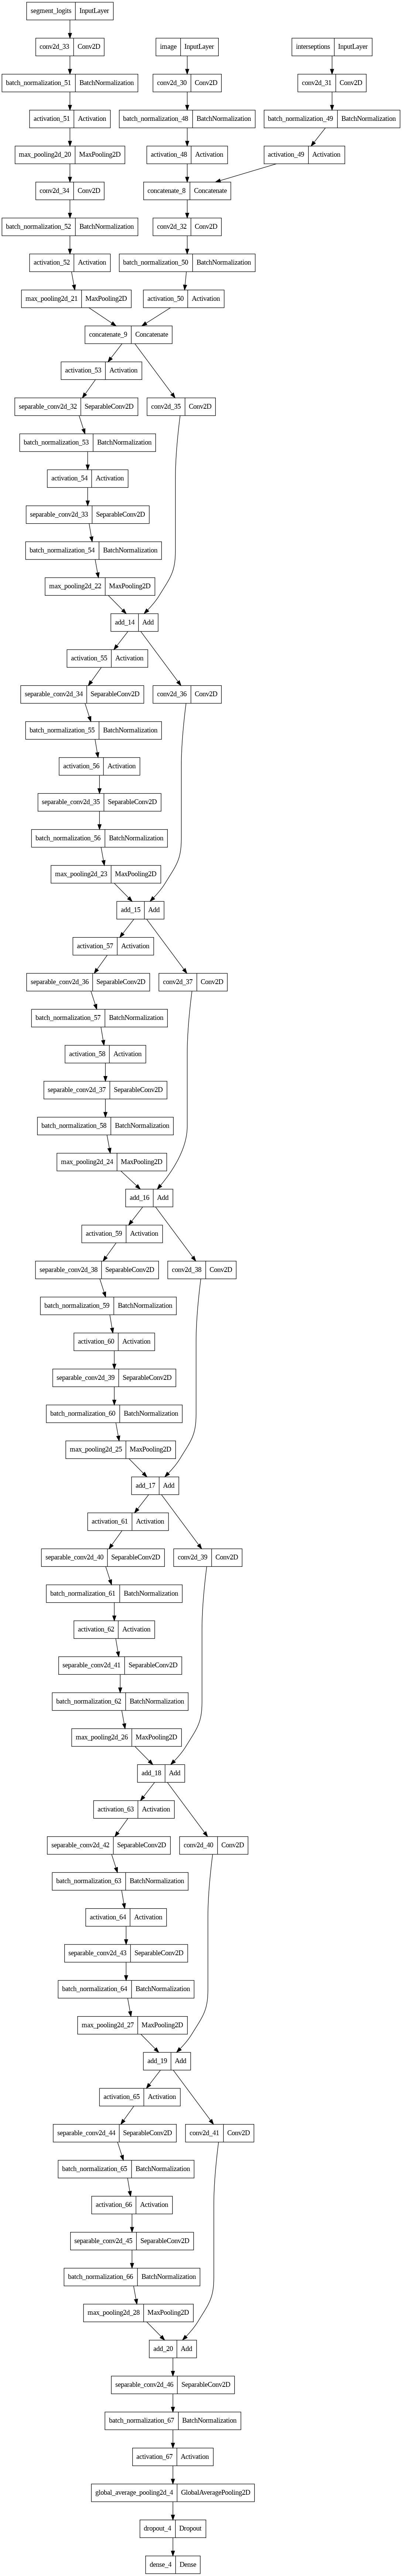

In [26]:
tf.keras.utils.plot_model(class_model)

# Test model

In [26]:
from sklearn.metrics import classification_report
from Data_preprocessing import Generator2Сlassificator
from Additions import show_predictions, data2predict

In [27]:
# получаем случайные картинки для показа с рабочих адресов
W, H =  256, 256
qty_images = 25

idx = np.random.randint(0, train_df.shape[0], qty_images)
y_test =  train_df.loc[idx].label.values
urls_test = train_df.loc[idx].pic_url.values

images, work_urls, y_test = data2predict(urls = urls_test,
                                              labels = y_test,
                                              resize2 = (W, H),
                                              )

# получаем с рабочих адресов генератор модели
test_generator = Generator2Сlassificator(
                                        urls = work_urls,
                                        labels = y_test,
                                        take_data = get_data,
                                        good_links = (),
                                        text_preprocess = text_detect,
                                        text_reader = reader,
                                        mask_predictor = mask_predictor,
                                        recize2 = (64,64), # такой вход у модели по маскам и картинкам
                                        batch_size=1
    )

dict_catagory

{0: 'good_infographics',
 1: 'other_infographics',
 2: 'bad_infographics',
 3: 'clean_photo_good_background',
 4: 'clean_photo_bad_background',
 5: 'clean_photo_image_background'}

In [36]:
# получаем предикты
pred_y_test = np.argmax(class_model.predict(test_generator), axis = 1)

target_names = ["Class {} ({}) :".format(i, dict_catagory[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_test, pred_y_test, target_names = target_names)) # labels = list(dict_catagory())

25/25 [==============================] - 92s 4s/step
                                          precision    recall  f1-score   support

           Class 0 (good_infographics) :       0.33      0.80      0.47         5
          Class 1 (other_infographics) :       0.67      1.00      0.80         2
            Class 2 (bad_infographics) :       1.00      0.14      0.25         7
 Class 3 (clean_photo_good_background) :       0.25      1.00      0.40         1
  Class 4 (clean_photo_bad_background) :       1.00      0.33      0.50         6
Class 5 (clean_photo_image_background) :       0.33      0.25      0.29         4

                                accuracy                           0.44        25
                               macro avg       0.60      0.59      0.45        25
                            weighted avg       0.70      0.44      0.41        25



In [37]:
# получаем срезы верных и не верных
p = pred_y_test
y = y_test
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]
labels = list(dict_catagory.values())

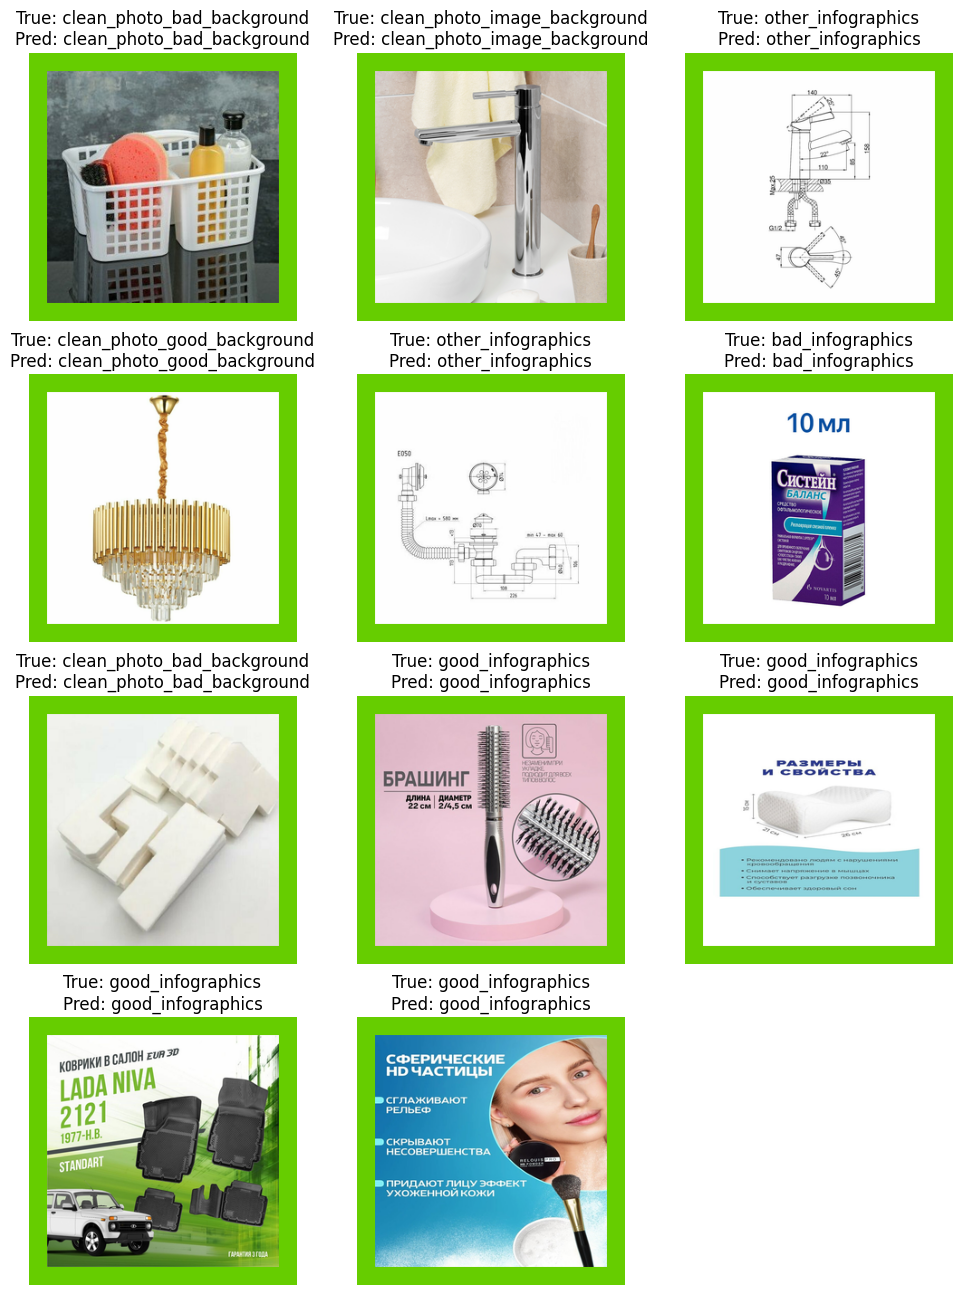

In [38]:
show_predictions(correct, images, pred_y_test, y_test, labels, 'green')

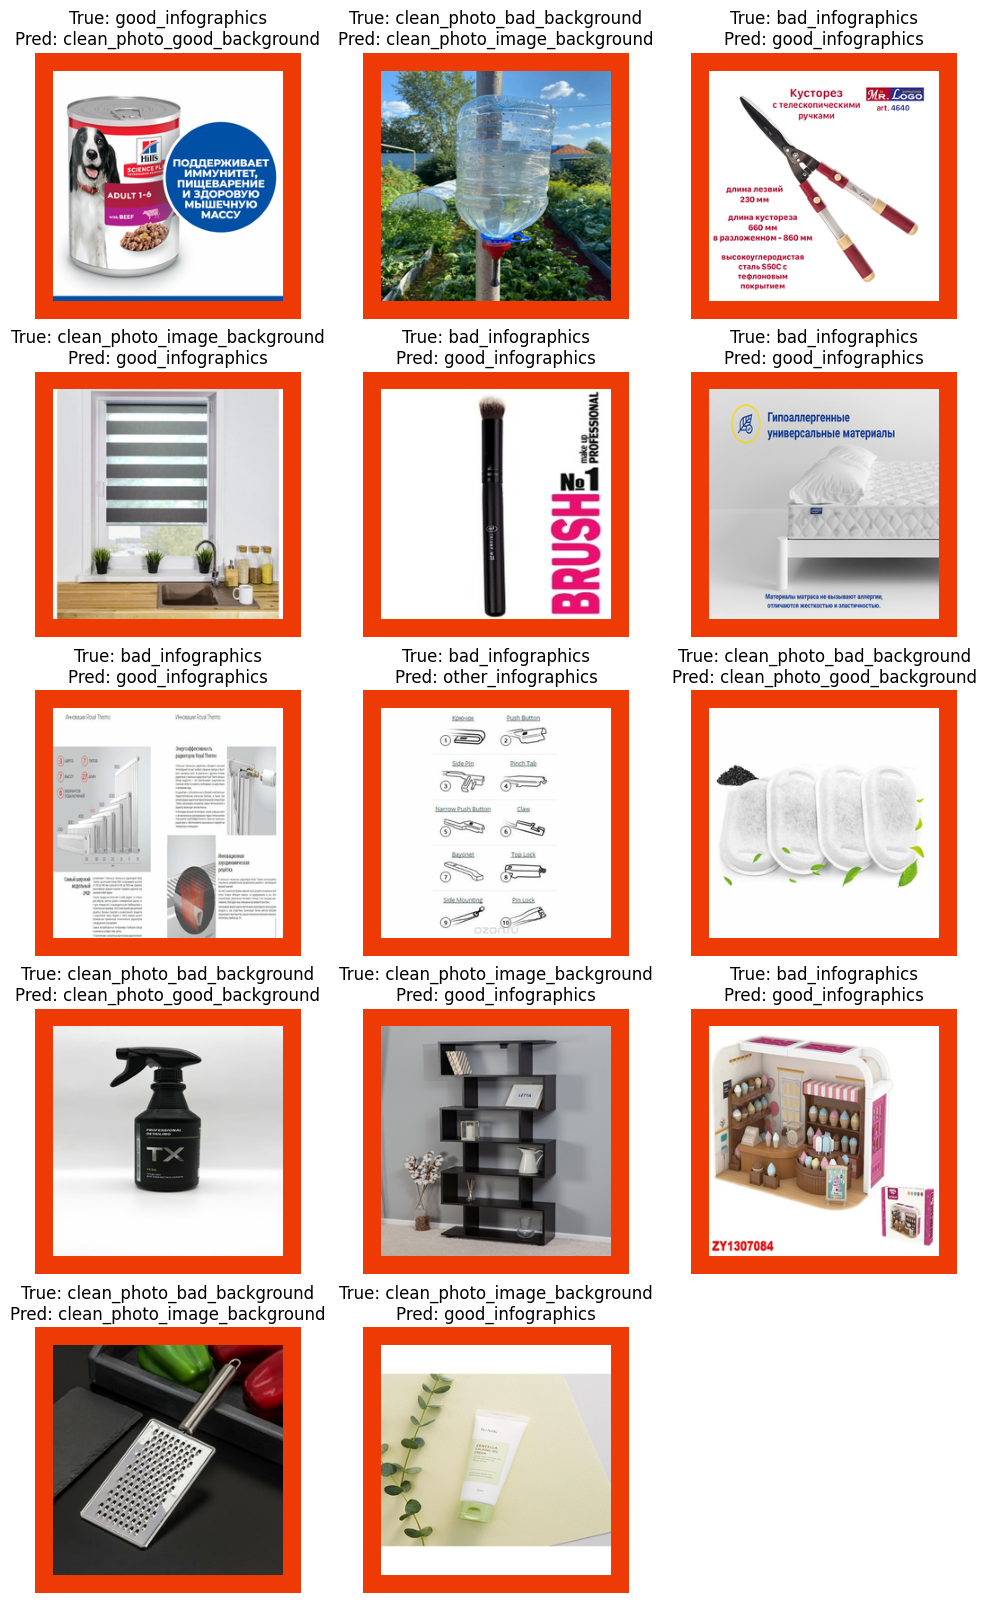

In [39]:
show_predictions(incorrect, images, pred_y_test, y_test, labels, 'red')